# 模型介绍

参考：https://blog.csdn.net/qqadssp/article/details/70431236

模型输入：32*32
模型层级： 
         
         (除了最后一个Dense的激活用activation以外，其他都用tanh)
         模型输入为32X32的灰度图像，
         第一层为6个5X5卷积核，不扩展边界；
         第二层为2X2的最大值池化层，步进为2X2；
         第三层为16个5X5卷积核，不扩展边界；
         第四层为2X2的最大值池化层，步进为2X2；
         第五层为展平层，并全连接120个节点；
         第六层为全连接层，84个节点；
         第七层为全连接softmax层，输出结果。

详细的keras搭建教程：

    1、这里采用Sequential模型，之后可以试试函数式模型，和tensorflow类似
    2、对于图像的分类问题，准备的输入数据要是 样本数×Width×Height×Channel，label则是 样本数×类别数
    3、在本问题中，需要通过 to_categorical方法对label做one-hot，才能达到目标效果。
    4、模型搭建的过程中，不需要考虑样本数 ，只需要填写图片的size就好，样本数会自动用None填充

# 读入数据

In [51]:
import os
import numpy as np
import struct
from keras.utils.np_utils import to_categorical

In [45]:
# 为了读数据
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels.idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images.idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 28,28,1)

    return images, labels

In [55]:
train_data,train_label=load_mnist(path='./')
# 相当于要把label也one-hot一下
train_label=to_categorical(train_label)
print(train_data.shape)
print(train_label.shape)

(60000, 28, 28, 1)
(60000, 10)


# 搭建模型

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten

In [57]:
model=Sequential()
model.add(Conv2D(kernel_size=5,strides=1,filters=6,input_shape=(28,28,1),activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=5,strides=1,filters=16,activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

batch_input_shape: (None, 28, 28, 1)


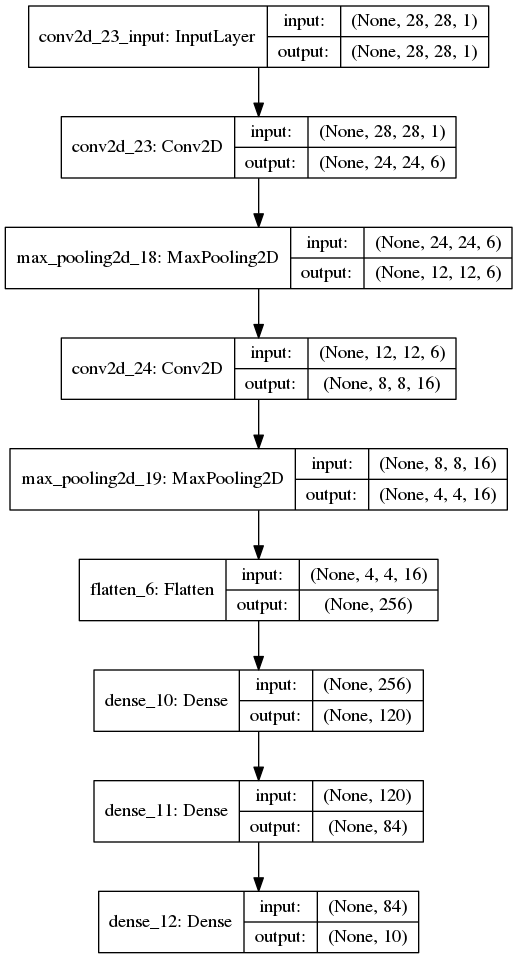

In [58]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file="model.png", show_shapes=True)
Image('model.png')

In [59]:
# 总共有k个样本
# 每一个eopch要运行 k/batch_size 次
# 我们只能指定batch_size 和 epoch数目
model.fit(train_data,train_label,batch_size=32,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 416us/step - loss: 1.2850 - acc: 0.8558 - val_loss: 0.1246 - val_acc: 0.9617
Epoch 2/10
48000/48000 [==============================] - 18s 373us/step - loss: 0.1107 - acc: 0.9675 - val_loss: 0.1027 - val_acc: 0.9688
Epoch 3/10
48000/48000 [==============================] - 18s 378us/step - loss: 0.0827 - acc: 0.9748 - val_loss: 0.0937 - val_acc: 0.9712
Epoch 4/10
48000/48000 [==============================] - 18s 378us/step - loss: 0.0673 - acc: 0.9796 - val_loss: 0.0892 - val_acc: 0.9757
Epoch 5/10
46912/48000 [============================>.] - ETA: 0s - loss: 0.0619 - acc: 0.9815

KeyboardInterrupt: 